In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\asada\\Desktop\\diamonds.csv')

In [3]:
df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
19250,1.32,Ideal,F,VS2,62.3,57.0,7983,7.06,6.97,4.37
21441,1.23,Ideal,F,VS2,61.7,57.0,9547,6.94,6.90,4.27
43242,0.42,Ideal,E,VVS1,61.6,56.0,1400,4.82,4.85,2.98
10535,1.00,Very Good,E,SI1,63.4,58.0,4805,6.29,6.26,3.98
37112,0.38,Very Good,G,VVS1,59.9,56.0,970,4.73,4.75,2.84


In [4]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [6]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [7]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

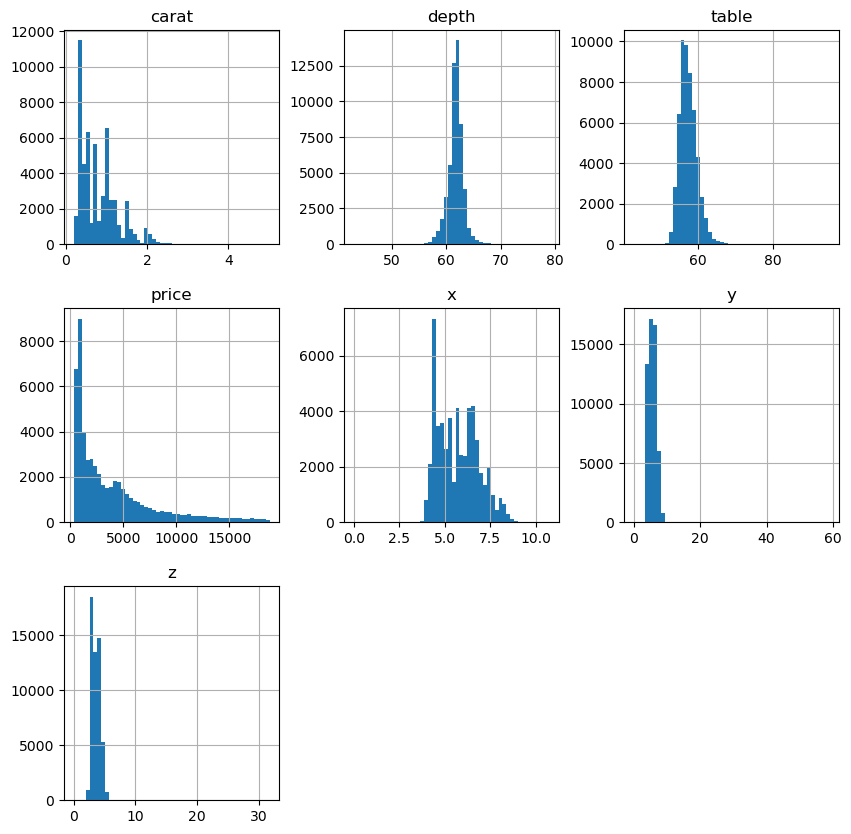

In [9]:
df.hist(figsize = (10,10), bins = 50)
plt.show()

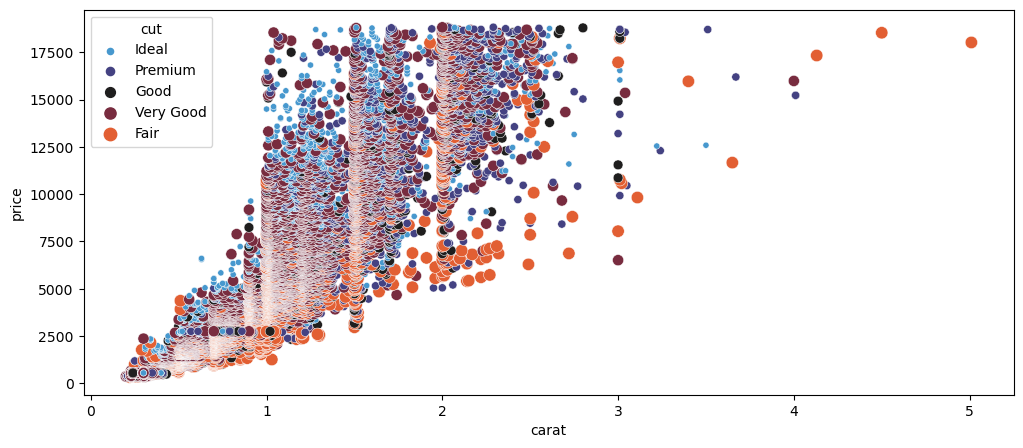

In [10]:
plt.figure(figsize=(12, 5))
 
unique_cuts = df['cut'].unique()
custom_palette = sns.color_palette( palette = 'icefire' ,n_colors=len(unique_cuts))

sns.scatterplot(data=df, x='carat', y="price", hue='cut', size='cut',sizes=(80, 20), palette=custom_palette, legend="full")
plt.show()

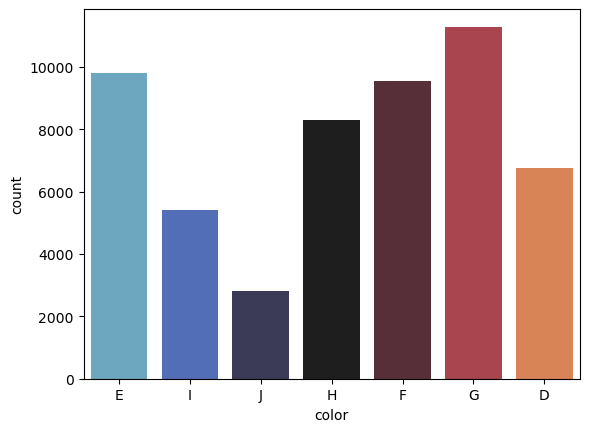

In [11]:
sns.countplot(x = df['color'], palette = 'icefire')
plt.show()

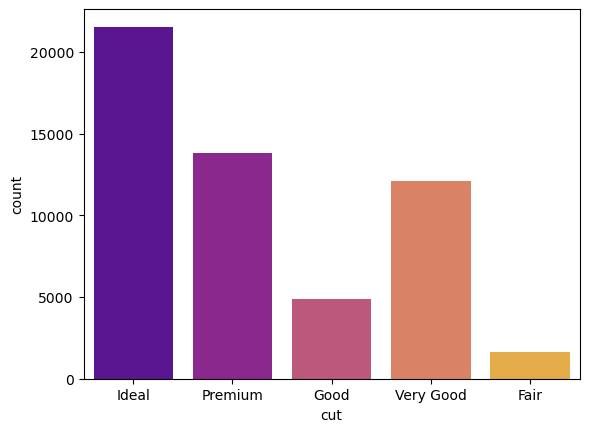

In [12]:
sns.countplot(x = df['cut'], palette = 'plasma')
plt.show()


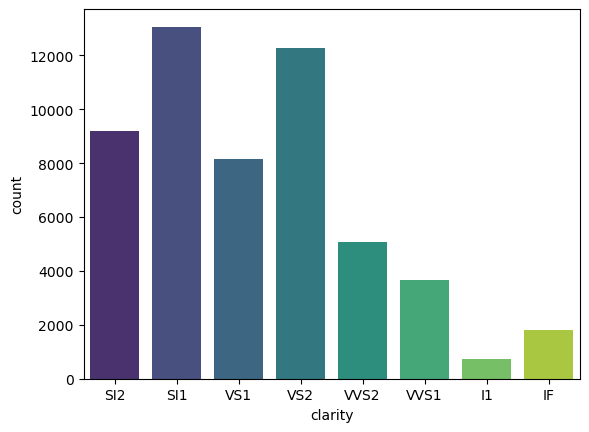

In [13]:
sns.countplot(x = df['clarity'], palette = 'viridis')
plt.show()

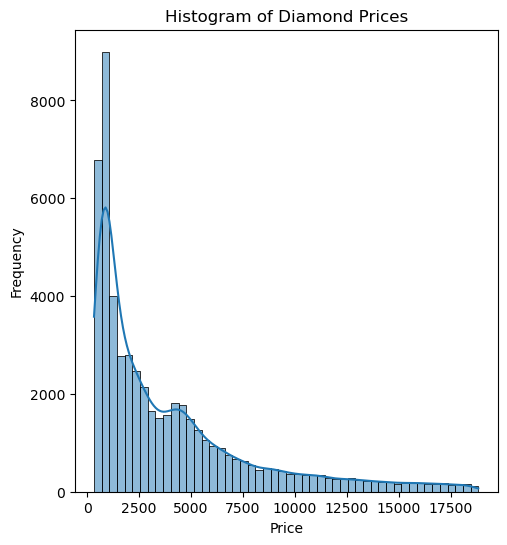

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Histogram of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [15]:
df1 = pd.get_dummies(df['clarity'])

In [16]:
df1.head()

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False
4,False,False,False,True,False,False,False,False


In [17]:
df2 = pd.concat([df,df1], axis = 'columns')

In [18]:
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,False,False,False,True,False,False,False,False
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,False,False,True,False,False,False,False,False
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,False,False,False,False,True,False,False,False
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,False,False,False,False,False,True,False,False
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,False,False,False,True,False,False,False,False


In [19]:
df2.drop('clarity', axis = 'columns', inplace = True)

In [20]:
df2.head()

,carat,cut,color,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,False,False,False,True,False,False,False,False
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,False,False,True,False,False,False,False,False
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,False,False,False,False,True,False,False,False
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,False,False,False,False,False,True,False,False
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,False,False,False,True,False,False,False,False


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder = LabelEncoder()

In [23]:
df2['cut_encoded'] = label_encoder.fit_transform(df2['cut'])

In [24]:
df2.head()

,carat,cut,color,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,cut_encoded
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,False,False,False,True,False,False,False,False,2
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,False,False,True,False,False,False,False,False,3
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,False,False,False,False,True,False,False,False,1
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,False,False,False,False,False,True,False,False,3
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,False,False,False,True,False,False,False,False,1


In [25]:
df2.drop('cut', axis = 'columns', inplace = True)

In [26]:
df2.sample(5)

,carat,color,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,cut_encoded
47192,0.50,F,62.4,57.0,1838,5.13,5.10,3.19,False,False,True,False,False,False,False,False,3
35579,0.35,F,62.4,57.0,906,4.51,4.50,2.81,False,False,False,False,False,True,False,False,2
16255,1.35,H,61.6,55.0,6502,7.08,7.02,4.34,False,False,False,False,False,True,False,False,2
26194,2.01,G,65.6,56.0,15562,7.89,7.84,6.16,False,False,False,True,False,False,False,False,0
36127,0.34,F,59.6,60.0,928,4.59,4.54,2.72,False,False,False,False,False,False,False,True,3


In [27]:
dummies_color = pd.get_dummies(df['color'])

In [28]:
dummies_color.head()

,D,E,F,G,H,I,J
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True


In [29]:
df_final = pd.concat([df2, dummies_color], axis = 'columns')

In [30]:
df_final.sample(5)

,carat,color,depth,table,price,x,y,z,I1,IF,...,VVS1,VVS2,cut_encoded,D,E,F,G,H,I,J
13152,1.11,H,58.8,59.0,5439,6.79,6.74,3.98,False,False,...,False,False,3,False,False,False,False,True,False,False
26345,0.32,G,62.8,58.0,645,4.34,4.39,2.74,False,False,...,False,False,4,False,False,False,True,False,False,False
26951,2.19,H,61.6,58.0,17016,8.35,8.30,5.13,False,False,...,False,False,3,False,False,False,False,True,False,False
10466,1.10,E,61.3,58.0,4791,6.64,6.71,4.09,False,False,...,False,False,4,False,True,False,False,False,False,False
30967,0.38,I,62.3,56.0,746,4.63,4.58,2.87,False,False,...,False,False,2,False,False,False,False,False,True,False


In [31]:
df_final.drop('color', axis = 'columns', inplace = True)

In [32]:
df_final.sample(5)

,carat,depth,table,price,x,y,z,I1,IF,SI1,...,VVS1,VVS2,cut_encoded,D,E,F,G,H,I,J
45040,0.54,60.9,55.0,1639,5.25,5.31,3.21,False,False,False,...,False,False,4,False,False,True,False,False,False,False
48780,0.51,58.2,58.0,2020,5.33,5.29,3.09,False,False,False,...,False,False,3,False,True,False,False,False,False,False
52459,0.70,66.4,53.0,2516,5.51,5.49,3.65,False,False,False,...,False,False,0,False,False,True,False,False,False,False
11174,0.70,61.7,56.0,4951,5.68,5.73,3.52,False,False,False,...,True,False,2,False,False,True,False,False,False,False
50297,0.27,60.5,60.0,544,4.19,4.20,2.54,False,False,False,...,False,True,4,False,True,False,False,False,False,False


In [33]:
X = df_final.drop('price', axis = 'columns')
y = df_final['price']

In [55]:
y = pd.DataFrame(y)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
X_scaled = scaler.fit_transform(X)

In [68]:
y_scaled = scaler.fit_transform(y)


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 38, shuffle = True)

In [86]:
from sklearn.linear_model import RandomForestRegressor

In [93]:
model = RandomForestRegressor(n_estimators=70,random_state=0, max_depth = None)


In [94]:
model.fit(X_train, y_train)

F:\conda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=70, random_state=0)

In [95]:
model.score(X_test, y_test)

0.97959548220044

In [96]:
y_pred = model.predict(X_test)

In [97]:
y_pred

array([1095.84285714, 1560.2       , 2127.2       , ...,  980.37142857,
       7214.85714286, 9587.12857143])

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [99]:
mse = mean_squared_error(y_test, y_pred)

In [100]:
mae = mean_absolute_error(y_test, y_pred)

In [101]:
r2 = r2_score(y_test, y_pred)

In [102]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 323771.61670526286
Mean Absolute Error (MAE): 279.8104702684683
R-squared (R2): 0.97959548220044
